In [1]:
import pandas as pd
import numpy as np
import random
from utils.utils import split_samples, generate_connectivity_matrix, find_neighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from models.AE_model import AE
from models.MLP_classifier import MLP_classifier
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# random.seed(100)
# np.random.seed(42)

In [2]:
df = pd.read_csv('dataset/hmnist_28_28_L.csv')

In [3]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,101,110,154,160,95,44,139,184,164,160,...,103,73,72,75,152,130,96,133,159,2
1,67,66,69,76,80,57,46,67,90,77,...,58,65,74,80,81,83,77,75,73,2
2,127,137,121,140,170,111,128,117,60,105,...,90,100,143,119,148,140,193,146,97,2
3,80,90,101,106,120,100,99,66,63,91,...,131,109,97,102,71,93,120,84,62,2
4,153,141,121,132,110,131,119,99,101,91,...,117,121,136,178,192,210,189,149,155,2


In [4]:
# Fazendo as transformações nos conjuntos
positive_samples, labels = split_samples(df)

X = torch.tensor(df.iloc[:, :-1].values, dtype = torch.float32)
y = torch.tensor(df.label)

In [5]:
# X = X.view(-1, 28,28,3)
X = X/255
dataset = TensorDataset(X, y)
batch_size = 100
dataloader = DataLoader(dataset, batch_size=batch_size)

In [6]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

In [7]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

In [8]:
autoencoder = AE()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 0.00000001)

# Training the autoencoder
num_epochs = 10

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(img)
        loss = F.mse_loss(outputs, img)
        loss.backward()
        optimizer.step()
        # print(loss)

# print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    print(f'loss {loss.item():.4f}')

X_AE = autoencoder.encoder(X)

loss 0.1559
loss 0.1559
loss 0.1559
loss 0.1559
loss 0.1559
loss 0.1559
loss 0.1559
loss 0.1559
loss 0.1558
loss 0.1558


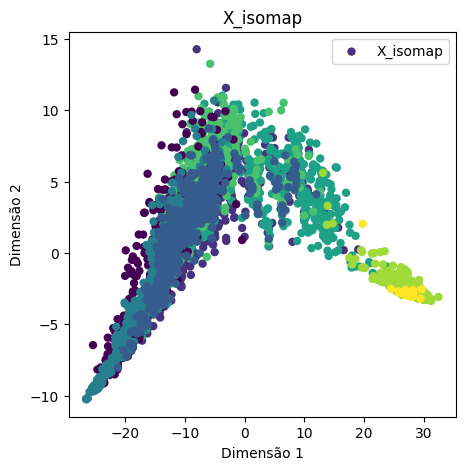

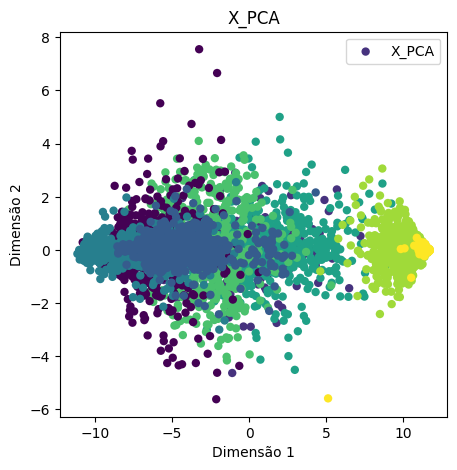

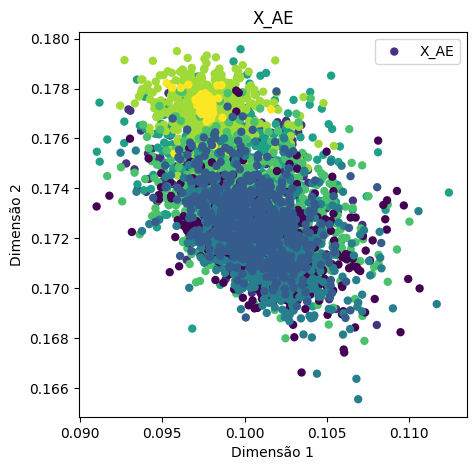

In [9]:
import matplotlib.pyplot as plt

mask_colors = torch.full((len(y),), 0)
for element in positive_samples:
    mask_colors[element] = y[element]

# Função para plotar os dados
def plot_data(X, title, xlabel, ylabel, label):
    plt.figure(figsize=(5, 5))
    plt.scatter(*zip(*X), c=y, label=label, linewidths=0.01)  # Adicionando a variável y como cor
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot para X_isomap
plot_data(X_isomap, 'X_isomap', 'Dimensão 1', 'Dimensão 2', 'X_isomap')

# Plot para X_PCA
plot_data(X_PCA, 'X_PCA', 'Dimensão 1', 'Dimensão 2', 'X_PCA')

# Plot para X_AE
X_AE_np = X_AE.detach().numpy()
plot_data(X_AE_np, 'X_AE', 'Dimensão 1', 'Dimensão 2', 'X_AE')


In [10]:
positive_labels = y[positive_samples]
nearest_neigh_idx, nearest_neigh_labels = find_neighbors(X, positive_labels, positive_samples)

In [11]:
augmented_idx = np.array(positive_samples.tolist() + nearest_neigh_idx)
augmented_labels = np.array(positive_labels.tolist() + nearest_neigh_labels)

In [12]:
augmented_idx

array([2786, 2351,  121,  805, 2728,  440, 3449,  192, 2313,  598, 2742,
        149, 1202, 4555, 3292,  506, 1235, 2325, 2285, 1308, 3464,   62,
        409, 3772, 1593, 4548, 4685, 3684, 4761, 4751, 4082, 3368, 1970,
        181, 1350,  806,   14, 3515, 4416, 2715, 2998, 4182,   53,  137,
        314,    6, 3892, 3969, 3360, 1198, 2060, 3454,  931, 3538, 1102,
       2539, 2521,   42, 3608, 4558, 1868, 3947, 3780, 4723, 1476, 2456,
       4252, 4195, 4852, 4130,  396, 4663, 1846, 1951,  876, 1759, 3461,
       3657, 1920, 4196,  837,  990,  954, 3463, 1597, 2647, 4908,  591,
        451, 4292, 4336, 2074, 1419, 2489, 2271, 4531, 1558, 3243, 1257,
        117, 1025,  357, 3725, 4650, 2671, 2218, 1578,  810, 4158, 1080,
       1923, 2394, 3249, 1514, 4552, 1460, 3422, 1362, 4163, 1345,  988,
       1340, 1959, 1171, 4673, 1066, 4870, 3164,  853, 4212, 2967, 2613,
       2849, 2063, 1017, 1538, 2680, 2270, 1740,  531, 4337, 4520, 3681,
       4149, 1879, 4231, 2184, 3773,  880, 1212, 14

In [13]:
augmented_connectivity_matrix = generate_connectivity_matrix(augmented_idx, augmented_labels, len(X))
# connectivity_matrix = generate_connectivity_matrix(positive_samples, labels, len(df))

In [17]:
numero_de_clusters = len(np.unique(augmented_labels)) # Especifique o número desejado de clusters
modelo_aglomerativo = AgglomerativeClustering(n_clusters=numero_de_clusters, connectivity=augmented_connectivity_matrix, linkage='average')
rotulos_clusters = modelo_aglomerativo.fit_predict(X_AE.detach().numpy())

/home/cagui/Desktop/Projeto 2 - Data Clustering/project2_PPGCC_clustering/venv/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:593: UserWarning: the number of connected components of the connectivity matrix is 4286 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
